### Authorship
@author: Alexandre Pereira Santos <br>
alexandre.santos(at)lmu.de<br>
- many scripts in this notebook com from geemap (see below)

### Tasks
- open a list of raster files
- convert and save all rasters as ASCII

### Prerequisites
- Rasters should be in the appropriate CRS, as no projection is used
- rasterio

# init

In [2]:
from pathlib import Path
import rasterio
import matplotlib.pyplot as plt

from rasterio import features
import numpy as np
from rasterio.plot import show

def get_coords(gdf):
    coords = gdf.envelope
    epsg_coords = coords #.crs.to_epsg()
    transform = [coords.bounds.values[0][0], coords.bounds.values[0][1], coords.bounds.values[0][2], coords.bounds.values[0][3]]
    #roi = ee.Geometry.BBox(west=transform[0], south=transform[1], east=transform[2], north=transform[3])
    #rec_roi = ee.Geometry.Rectangle(transform[0],transform[1],transform[2],transform[3])
    #coi = roi.centroid(maxError=1)
    return epsg_coords, transform #roi, rec_roi, coi

# imports

In [56]:
# import a list of raster files
# all files should be in the same folder and share the projection

raster_folder = Path('../data/raw/')

MUM_raster_list = [ 'MUM_DEM_slope_TanDEM_X_30m.tif',
                   'MUM_URB_slum_clusters_MMRDA_1985_30m.tif','MUM_URB_slum_clusters_MMRDA_2000_30m.tif','MUM_URB_slum_clusters_MMRDA_2015_30m.tif',
                   'MUM_URB_urbanisation_1985_EOC_WUF_30m.tif','MUM_URB_urbanisation_2000_EOC_WUF_30m.tif','MUM_URB_urbanisation_2015_EOC_WUF_30m.tif',
                   'MUM_POP_population_1985_GHSL_30m.tif','MUM_POP_population_2000_GHSL_30m.tif','MUM_POP_population_2015_GHSL_30m.tif',
                   'MUM_ENV_NDVI_Sentinel2_2000_30m.tif','MUM_HYD_Flood_map_Global_HAND_30m.tif'] # to include: real estate prices, land use

JAK_raster_list = ['JAK_DEM_slope_TanDEM_X_30m.tif', 
                   'JAK_URB_urbanisation_1985_EOC_WUF_30m.tif','JAK_URB_urbanisation_2000_EOC_WUF_30m.tif','JAK_URB_urbanisation_2015_EOC_WUF_30m.tif',
                   'JAK_POP_population_1985_GHSL_30m.tif','JAK_POP_population_2000_GHSL_30m.tif','JAK_POP_population_2015_GHSL_30m.tif',
                   'JAK_ENV_NDVI_Sentinel2_2000_30m.tif','JAK_HYD_Flood_map_Global_HAND.tif'] 

MAN_raster_list = ['MAN_DEM_slope_TanDEM_X_30m.tif',
                'MAN_URB_urbanisation_1985_EOC_WUF_30m.tif','MAN_URB_urbanisation_2000_EOC_WUF_30m.tif','MAN_URB_urbanisation_2015_EOC_WUF_30m.tif',
                'MAN_ENV_NDVI_Sentinel2_2000_30m.tif','MAN_HYD_Flood_map_Global_HAND.tif','MAN_ENV_LULC_30m_2020_GlobalLand.tif'
]


In [53]:
# define a function that opens a list of raster files and stores them in a list (should it be a dict?)
# the function should also print the crs of the raster files
def open_raster_list(raster_list, raster_folder):
    open_rasters_dict = {} # create a dict to store the arrays, crs and transform of the rasters
    array_list = [] # create a list to store the names of the rasters, to be used as keys in the dict later
    
    # loop through the list of raster files
    for i in range(len(raster_list)):
        raster_path = raster_folder / raster_list[i] #compose the path to the raster file
        raster_name = raster_list[i].split('.')[0] #extract the name of the raster file (drop the file extension)
        array_list.append(raster_name) #append the name of the raster file to the list of arrays
    
        with rasterio.open(raster_path, 'r') as src:
            array = src.read(1)  # read the raster as an array
            crs = src.crs # we need the crs and transform of the raster to export it at the end
            transform = src.transform
            width = src.shape[1]
            height = src.shape[0]
            dtype = array.dtype
            print(src.crs)

            # update the dict open_rasters with the arrays, crs and transform
            open_rasters_dict[array_list[i]] = {'array':array,'crs':crs,'dtype':dtype,'transform':transform,'height':height,'width':width}
    return open_rasters_dict, array_list

In [57]:
# import the rasters for each city at a time
input_which_city = input('Which city do you want to import the rasters for? (1 = MUM, 2 = JAK, 3 = MAN:')
if input_which_city == '1':
    raster_list = MUM_raster_list
    
elif input_which_city == '2':
    raster_list = JAK_raster_list
    
elif input_which_city == '3':
    raster_list = MAN_raster_list
    
else:
    print('Please enter a valid city number')
    exit()
dict_open_raster = {}
array_list = []
dict_open_raster,array_list = open_raster_list(raster_list, raster_folder)
#list_open_raster


EPSG:32643
EPSG:32643
EPSG:32643
EPSG:32643
EPSG:32643
EPSG:32643
EPSG:32643
EPSG:32643
EPSG:32643
EPSG:32643
EPSG:32643
EPSG:32643


# analysis

In [61]:
raster_list = ['MUM_TRA_all_roads_OSM_2024_30m.tif','MUM_TRA_distance_to_major_roads_30m.tif','MUM_TRA_major_roads_OSM_2024_30m.tif',]
dict_open_raster = {}
array_list = []
dict_open_raster,array_list = open_raster_list(raster_list, raster_folder)

EPSG:32643
EPSG:32643
EPSG:32643


<Axes: >

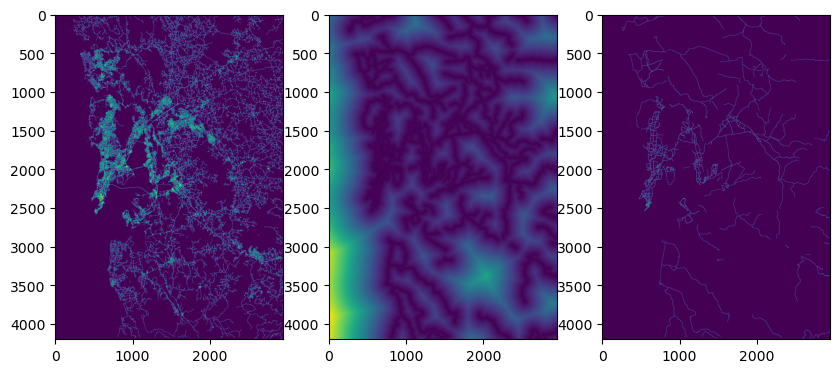

In [62]:
# Plot three rasters from the list
fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = (10, 30))
show(dict_open_raster[array_list[0]]['array'], ax = ax[0])
show(dict_open_raster[array_list[1]]['array'], ax = ax[1])
show(dict_open_raster[array_list[-1]]['array'], ax = ax[2])

plt.gca() 

# export

In [59]:
# export raster as ascii files
def export_raster_to_ascii(raster_obj, export_path, raster_data_type,crs,transform,height,width):
    with rasterio.open(export_path, "w", driver='AAIGrid',
                    height = height, width=width,
                    count=1, dtype=raster_data_type,
                    crs=crs, transform = transform) as dest:
        dest.write(raster_obj.astype(raster_data_type), indexes=1)

In [63]:
# export the calculated arrays as raster files in geotiff format
out_path = Path('../data/processed/')

for i in range(len(array_list)):
    array = dict_open_raster[array_list[i]]['array']
    export_path = out_path / (array_list[i] + '.txt')
    dtype = dict_open_raster[array_list[i]]['dtype']
    crs = dict_open_raster[array_list[i]]['crs']
    transform  = dict_open_raster[array_list[i]]['transform']
    width = dict_open_raster[array_list[i]]['width']
    height = dict_open_raster[array_list[i]]['height']
            
    export_raster_to_ascii(array, export_path, dtype, crs, transform, height, width)